In [1]:
# Let`s import all packages that we may need:

import sys
import numpy as np  # linear algebra
from scipy.stats import randint
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt  # this is used for the plot the graph 
import seaborn as sns  # used for plot interactive graph. 
from sklearn.model_selection import train_test_split  # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler  # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline  # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics  # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout



2024-03-17 18:56:13.694048: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 18:56:14.513692: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
weather_df = pd.read_csv('../processed_data/weather_2016_2023.csv', index_col=0)


In [21]:
missing_dict = dict().fromkeys(weather_df.columns)
for key in missing_dict.keys():
    missing_dict[key] = []


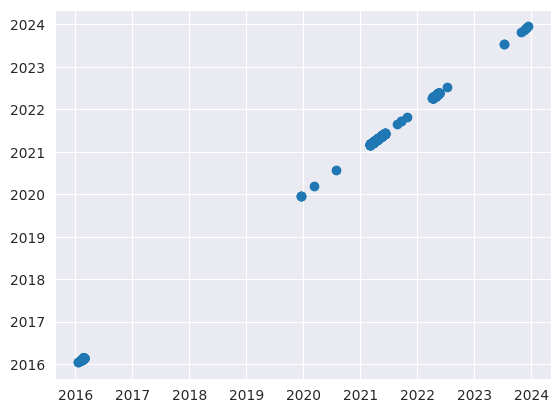

In [29]:

for col in weather_df.columns:
    weather_df[col] = weather_df[col].replace(-9999, None)
    missing_dict[col] = pd.Series(weather_df[weather_df[col].isnull()].index.to_list())

plt.scatter(missing_dict[weather_df.columns[0]], missing_dict[weather_df.columns[1]])

In [4]:
weather_df.index = pd.to_datetime(weather_df.index, utc=True)

In [ ]:
for col in weather_df.columns:
    pd.DataFrame(weather_df[[col]]).plot(figsize=(8, 3), title=col)
    plt.show()

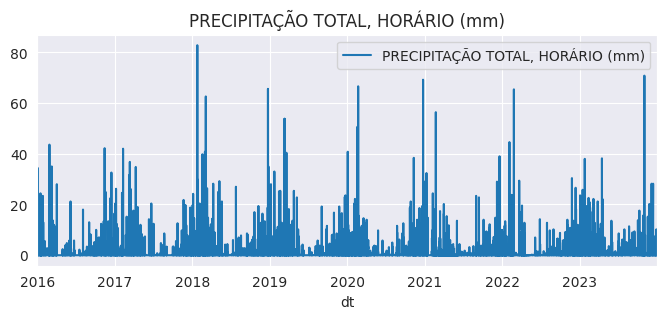

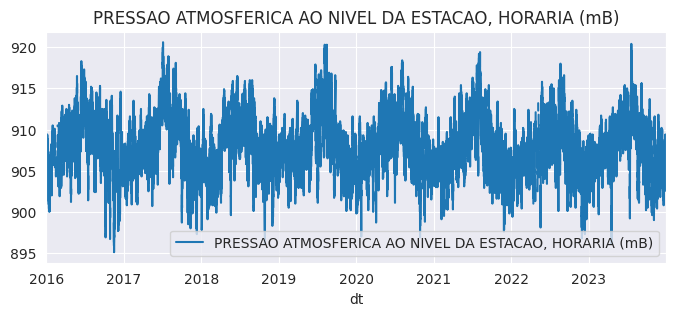

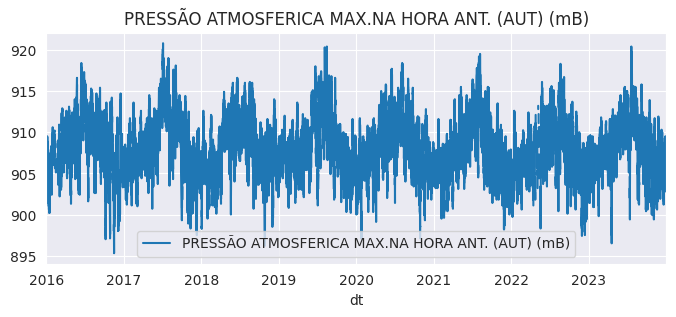

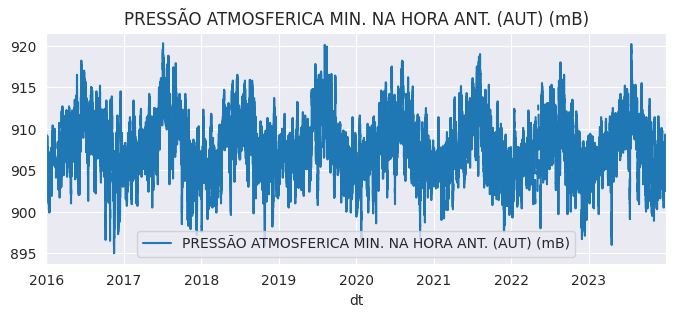

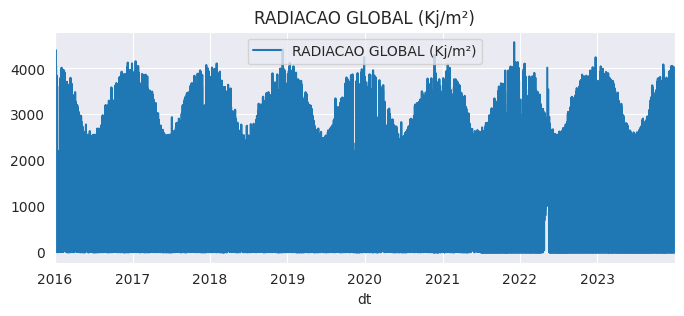

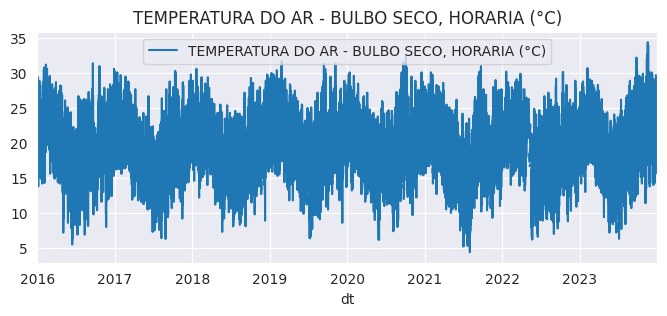

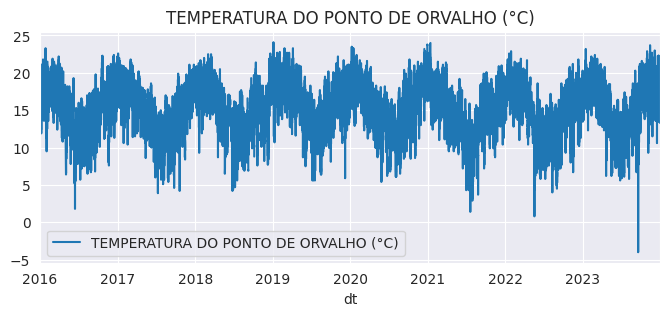

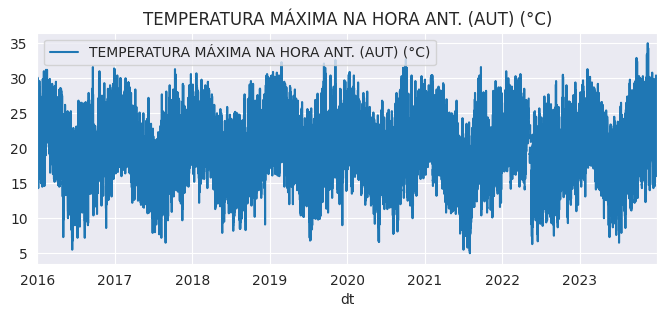

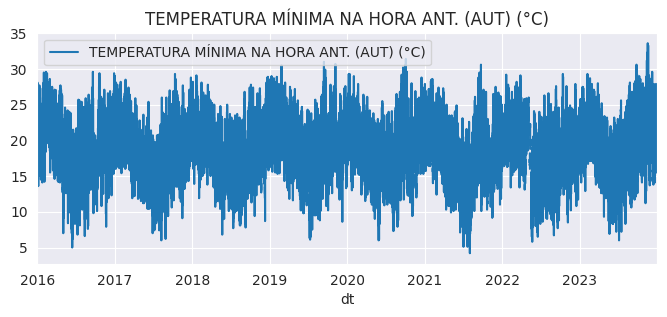

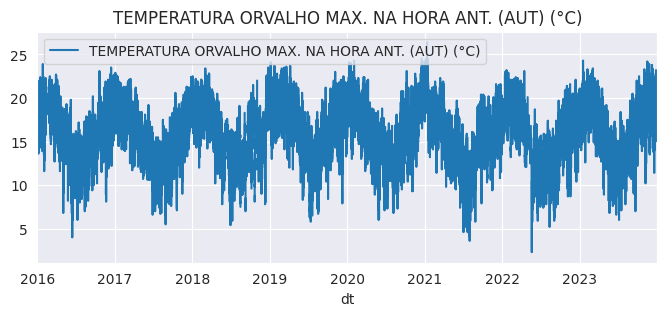

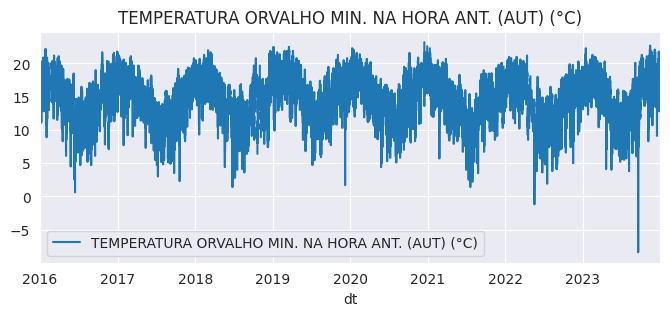

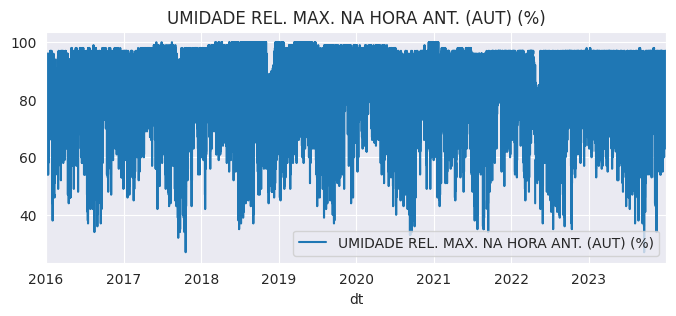

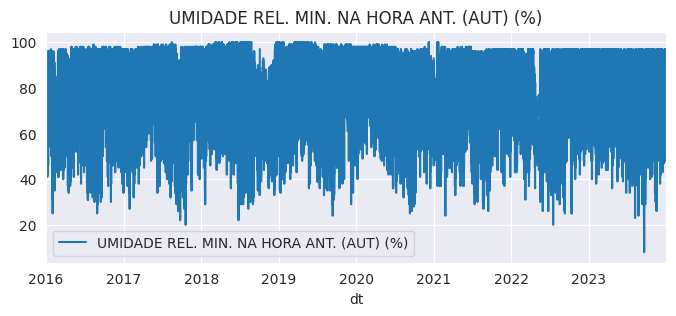

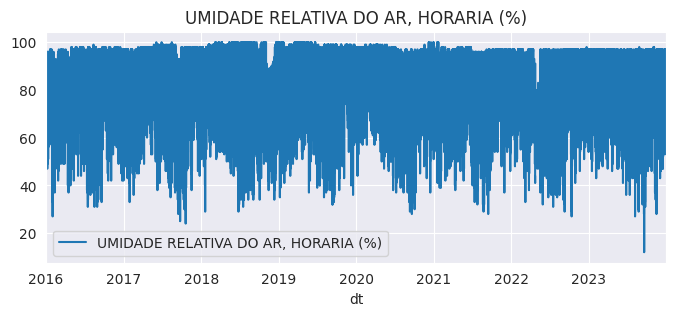

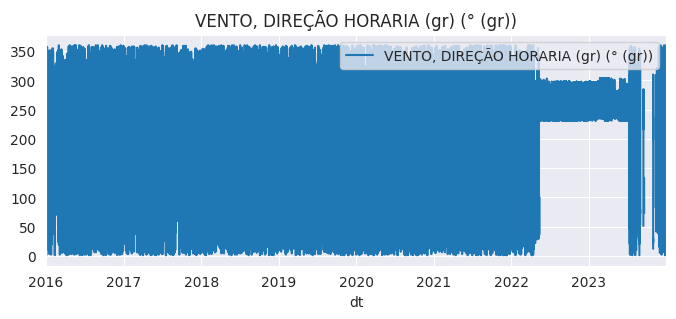

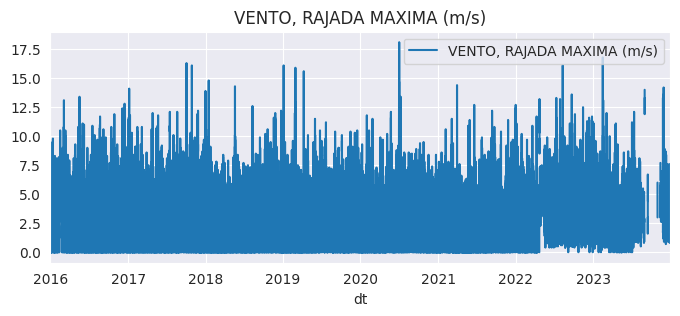

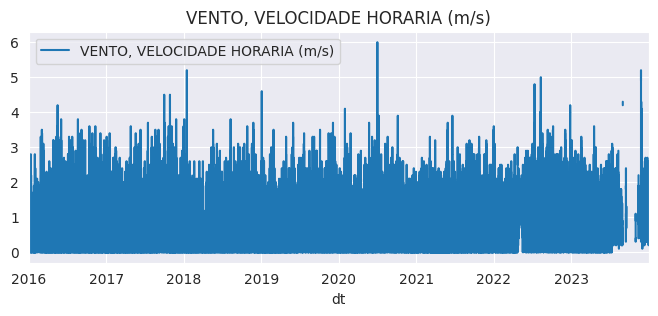

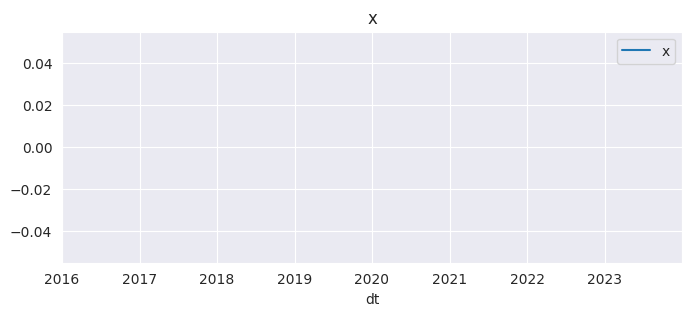

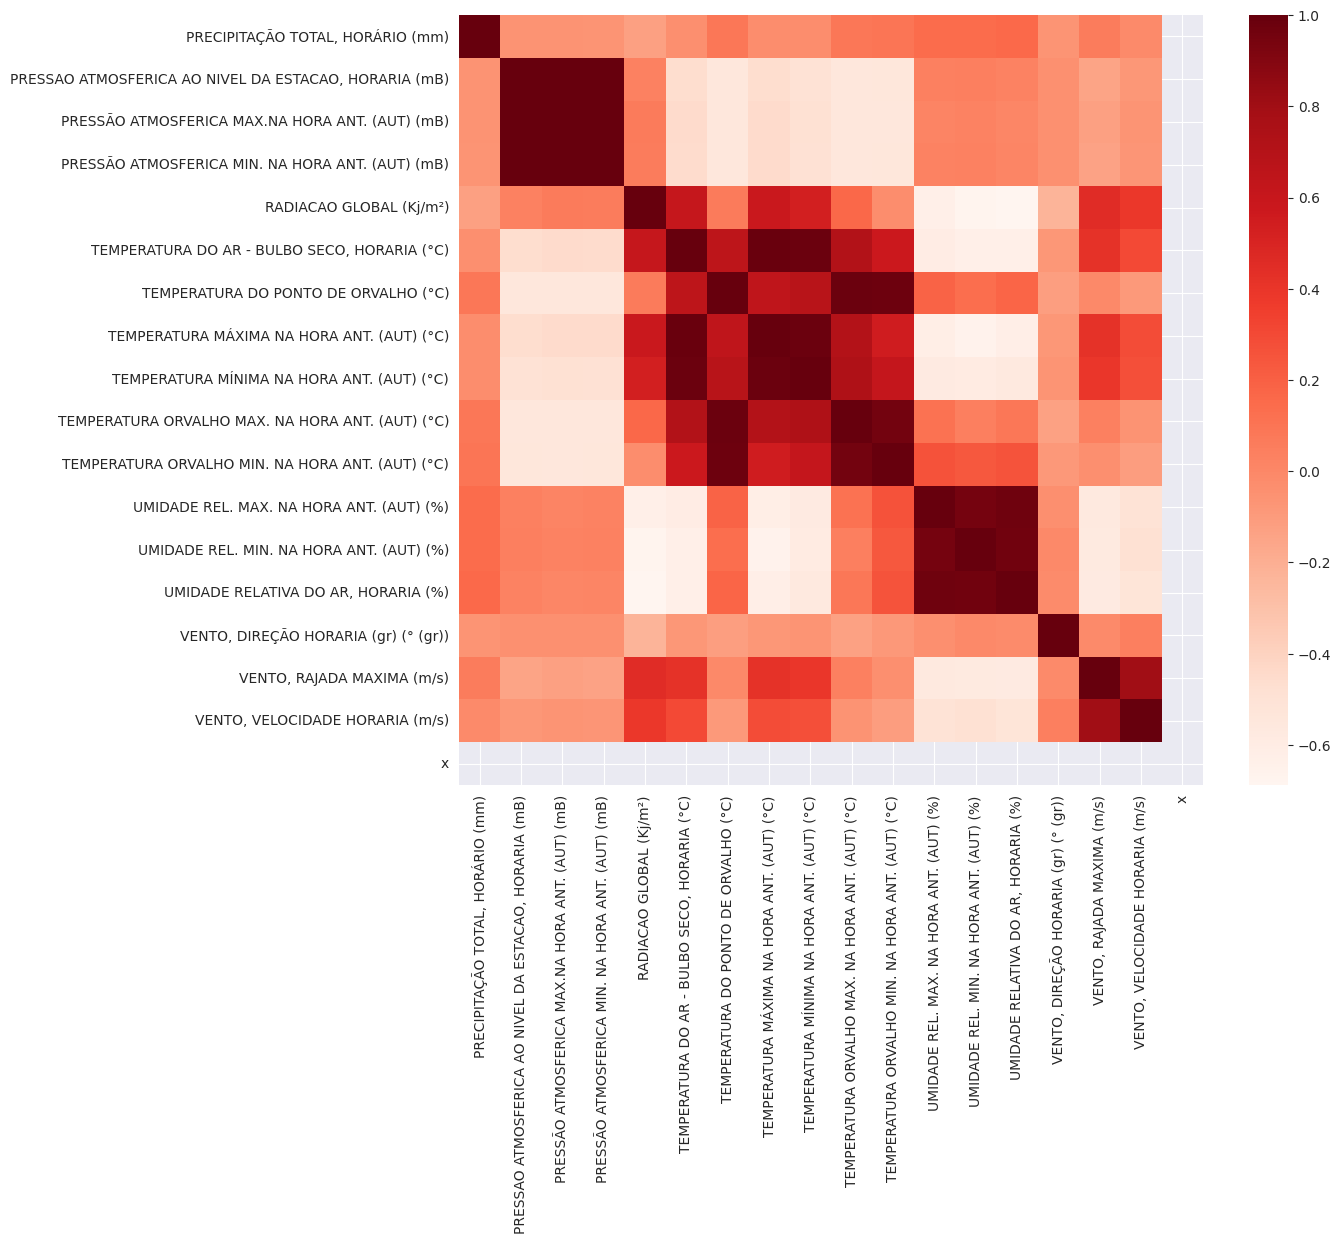

In [6]:
#plot correlation matrix
plt.figure(figsize=(12, 10))
cor = weather_df.corr()
sns.heatmap(cor,  cmap=plt.cm.Reds)
plt.show()


In [7]:
weather_df.head()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",x
dt,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,0.0,904.9,904.9,904.3,None,20.3,19.4,20.7,20.2,19.8,19.4,95.0,95.0,95.0,274.0,0.0,0.0,NaN
2016-01-01 01:00:00+00:00,0.0,905.1,905.3,904.9,None,20.5,19.7,20.5,20.1,19.7,19.3,95.0,95.0,95.0,263.0,1.6,0.0,NaN
2016-01-01 02:00:00+00:00,0.0,904.9,905.1,904.8,None,20.2,19.3,20.8,20.2,19.8,19.3,95.0,93.0,94.0,267.0,0.0,0.0,NaN
2016-01-01 03:00:00+00:00,0.0,904.3,904.9,904.2,None,20.9,19.4,21.2,20.2,19.8,19.3,95.0,90.0,91.0,247.0,0.0,0.0,NaN
2016-01-01 04:00:00+00:00,0.0,903.6,904.3,903.6,None,21.0,19.1,21.3,20.7,19.3,18.9,91.0,87.0,89.0,268.0,0.5,0.0,NaN
